# Importing the necessary libraries



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing the Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170500096/170498071 [==============================] - 11s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


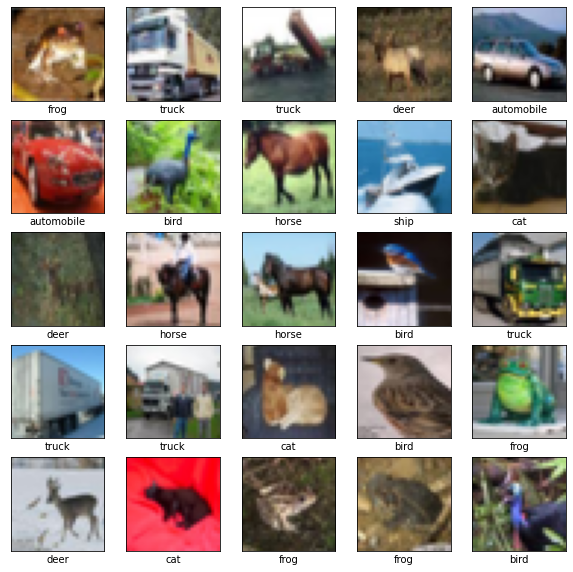

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Normalization and One hot encoding
Since our data is ready we now need to normalize the data, since normalizing the images in deep learning will produce very good results. Normalizing means we are bringing all the values in the data into a common scale 0-1. This will make out model converge fast and also we will not have any distrotions in the data.

For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalisation
x_train = x_train/255
x_test = x_test/255

#One hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Modeling

## Model 1: Base Model
two simple convolutional layers with 32 filters each and input shape is (32 32 3) and activation will be relu.


In [ ]:
model1=Sequential()

model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
#Training the model
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2173 - accuracy: 0.9227 - val_loss: 1.8549 - val_accuracy: 0.6529
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2023 - accuracy: 0.9275 - val_loss: 1.9499 - val_accuracy: 0.6489
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1864 - accuracy: 0.9335 - val_loss: 2.1246 - val_accuracy: 0.6468
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1777 - accuracy: 0.9371 - val_loss: 2.1704 - val_accuracy: 0.6502
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1623 - accuracy: 0.9424 - val_loss: 2.2358 - val_accuracy: 0.6453
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1574 - accuracy: 0.9444 - val_loss: 2.4063 - val_accuracy: 0.6416
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1561 - accuracy: 0.9448 - val_loss: 2.3763 - val_accuracy:

In [ ]:
# Let's see the accuracy
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 3.2679 - accuracy: 0.6432
Test Accuracy: 0.6431999802589417


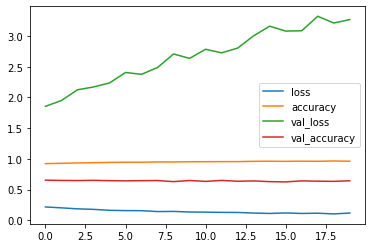

In [ ]:
pd.DataFrame(history1.history).plot()

## Model 2 : Add Drop out
Drop out literally means we gonna drop some of the neural units randomly from our network, which forces the next layer to learn the patterns again. In this way our model will become more robust and generalizes well. Lets try to add drop out after each CNN layer + MaxPool Layer.

In [ ]:
model2=Sequential()

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) #Drop 25% of the units from the layer.

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Training our model
history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7821 - accuracy: 0.3399 - val_loss: 1.2698 - val_accuracy: 0.5412
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3044 - accuracy: 0.5301 - val_loss: 1.1451 - val_accuracy: 0.5970
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1557 - accuracy: 0.5894 - val_loss: 1.0649 - val_accuracy: 0.6309
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0670 - accuracy: 0.6246 - val_loss: 0.9967 - val_accuracy: 0.6571
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9844 - accuracy: 0.6540 - val_loss: 0.9503 - val_accuracy: 0.6729
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9231 - accuracy: 0.6741 - val_loss: 0.9710 - val_accuracy: 0.6662
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8748 - accuracy: 0.6907 - val_loss: 0.9220 - val_accuracy:

In [ ]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9217 - accuracy: 0.7000
Test Accuracy: 0.699999988079071


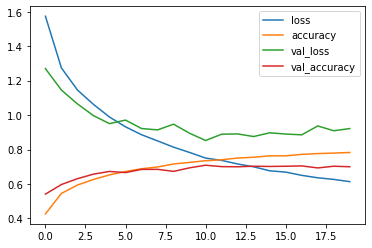

In [ ]:
pd.DataFrame(history2.history).plot()

In [ ]:
print(model2.metrics_names)
print(model2.evaluate(x_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[0.9217097759246826, 0.699999988079071]


## Model 3 : Add More layers with more filters.

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))
model3.add(Dense(units = 1024, activation = 'relu'))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Training our model
history3=model3.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat)) 

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7639 - accuracy: 0.3375 - val_loss: 1.2462 - val_accuracy: 0.5592
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2179 - accuracy: 0.5624 - val_loss: 1.0095 - val_accuracy: 0.6476
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0028 - accuracy: 0.6453 - val_loss: 0.8738 - val_accuracy: 0.6914
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8845 - accuracy: 0.6857 - val_loss: 0.8332 - val_accuracy: 0.7122
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8095 - accuracy: 0.7156 - val_loss: 0.8179 - val_accuracy: 0.7201
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7498 - accuracy: 0.7361 - val_loss: 0.7595 - val_accuracy: 0.7407
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6946 - accuracy: 0.7522 - val_loss: 0.7556 - val_ac

In [ ]:
evaluation = model3.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.0008 - accuracy: 0.7629
Test Accuracy: 0.7628999948501587


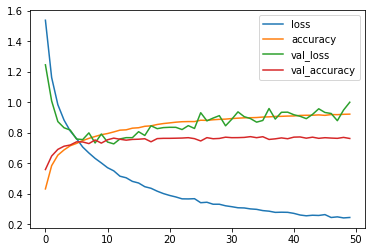

In [ ]:
pd.DataFrame(history3.history).plot()

## Model 4: Increased layers and Filters along with Increased dropout




In [ ]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())

model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

# compile model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model
history4=model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9775 - accuracy: 0.2661 - val_loss: 1.3023 - val_accuracy: 0.5264
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3531 - accuracy: 0.5128 - val_loss: 1.0406 - val_accuracy: 0.6361
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1259 - accuracy: 0.6012 - val_loss: 0.9223 - val_accuracy: 0.6734
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0116 - accuracy: 0.6463 - val_loss: 0.8865 - val_accuracy: 0.6865
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9369 - accuracy: 0.6746 - val_loss: 0.8373 - val_accuracy: 0.7051
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8896 - accuracy: 0.6913 - val_loss: 0.7798 - val_accuracy: 0.7263
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8491 - accuracy: 0.7053 - val_loss: 0.7793 - val_accuracy

In [ ]:
evaluation = model4.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.7884
Test Accuracy: 0.7883999943733215


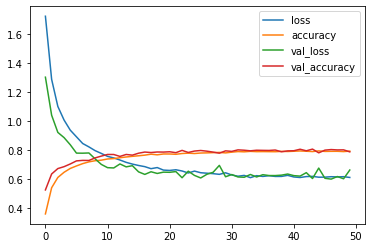

In [ ]:
pd.DataFrame(history4.history).plot()


## Model 5: Adding Batch Normalization
Batch normalization works just the same way as we normalize the input data where we divided the x_train/255. What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions. Our input layer is lucky enough to have everything in same scale why not the rest of the layers?

This is what exactly we do in batch normalization, when ever we pass the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.

Also the kind of normalization we use is batch normalization which means we compute mean and varience for each mini batch not the whole data.

In [ ]:
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())

model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))

model5.add(Flatten())

model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

# compile model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training model
history5=model5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 45s 7ms/step - loss: 2.0152 - accuracy: 0.3407 - val_loss: 1.2540 - val_accuracy: 0.5597
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1624 - accuracy: 0.5833 - val_loss: 0.9307 - val_accuracy: 0.6673
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9318 - accuracy: 0.6782 - val_loss: 0.8214 - val_accuracy: 0.7154
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8096 - accuracy: 0.7213 - val_loss: 0.6691 - val_accuracy: 0.7677
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7353 - accuracy: 0.7515 - val_loss: 0.6164 - val_accuracy: 0.7844
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6550 - accuracy: 0.7735 - val_loss: 0.5557 - val_accuracy: 0.8081
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6101 - accuracy: 0.7943 - val_loss: 0.5291 - val_ac

In [ ]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.8699
Test Accuracy: 0.8698999881744385


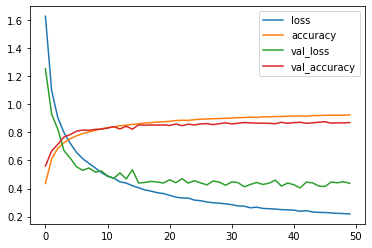

In [ ]:
pd.DataFrame(history5.history).plot()

## Model 6: Image augmentation

#### Build and train the model

In [ ]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.4))

model6.add(Flatten())

model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))

# compile model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train_cat)
steps = int(x_train.shape[0] / 64)
history6=model6.fit_generator(it_train,epochs=200,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))
# history6=model6.fit(x_train,y_train_cat,epochs=200,validation_data=(x_test,y_test_cat))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
781/781 [==============================] - 58s 35ms/step - loss: 1.9257 - accuracy: 0.3463 - val_loss: 1.5242 - val_accuracy: 0.4567
Epoch 2/200
781/781 [==============================] - 27s 35ms/step - loss: 1.4641 - accuracy: 0.4698 - val_loss: 1.3539 - val_accuracy: 0.5200
Epoch 3/200
781/781 [==============================] - 27s 34ms/step - loss: 1.2870 - accuracy: 0.5410 - val_loss: 1.1958 - val_accuracy: 0.5880
Epoch 4/200
781/781 [==============================] - 26s 33ms/step - loss: 1.1788 - accuracy: 0.5829 - val_loss: 1.1509 - val_accuracy: 0.6041
Epoch 5/200
781/781 [==============================] - 26s 34ms/step - loss: 1.0856 - accuracy: 0.6209 - val_loss: 1.0135 - val_accuracy: 0.6477
Epoch 6/200
781/781 [==============================] - 26s 33ms/step - loss: 1.0322 - accuracy: 0.6375 - val_loss: 0.8390 - val_accuracy: 0.7083
Epoch 7/200
781/781 [==============================] - 27s 34ms/step - loss: 0.9775 - accuracy: 0.6597 - val_loss: 0.8520 - val_ac

### Evaluate our model

In [ ]:
evaluation = model6.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3012 - accuracy: 0.8992
Test Accuracy: 0.8992000222206116


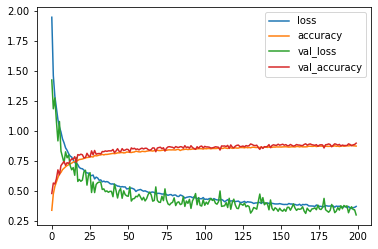

In [ ]:
pd.DataFrame(history6.history).plot()

##### Classification reports and Confusion matrix

In [ ]:
predictions = np.argmax(model6.predict(x_test), axis=-1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1000
           1       0.94      0.96      0.95      1000
           2       0.86      0.88      0.87      1000
           3       0.86      0.74      0.80      1000
           4       0.89      0.89      0.89      1000
           5       0.85      0.86      0.86      1000
           6       0.91      0.94      0.93      1000
           7       0.92      0.93      0.92      1000
           8       0.92      0.95      0.93      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



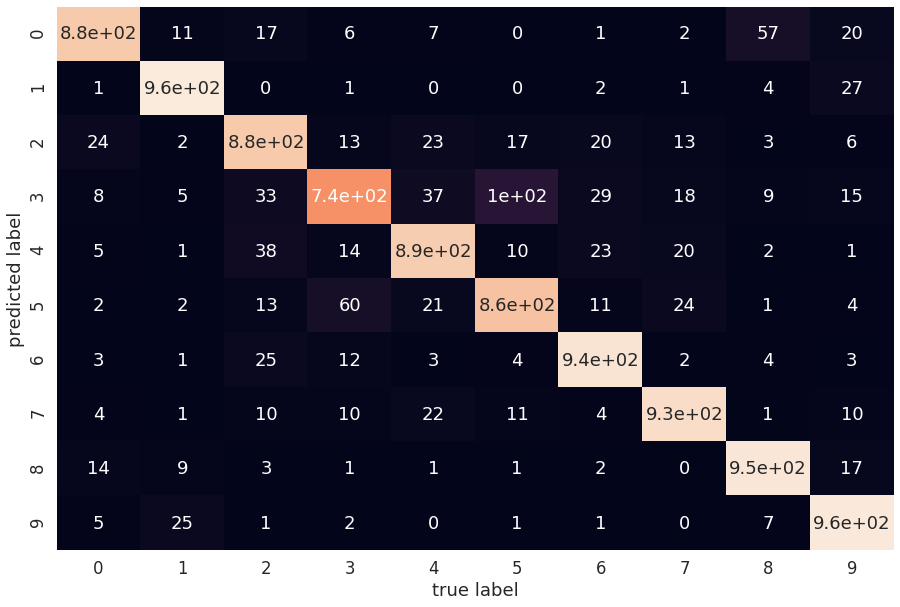

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, predictions)

### Making predictions

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

d = dict(zip(classes, class_names))
d

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

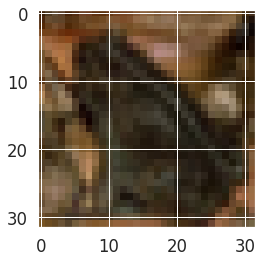

In [ ]:
my_image = x_test[30]

plt.imshow(my_image)

In [ ]:
input_img = my_image.reshape(1,32,32,3)

predictions = np.argmax(model6.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[30][0]]} \n\nPredicted class: {d[predictions]}")

True class: frog 

Predicted class: frog


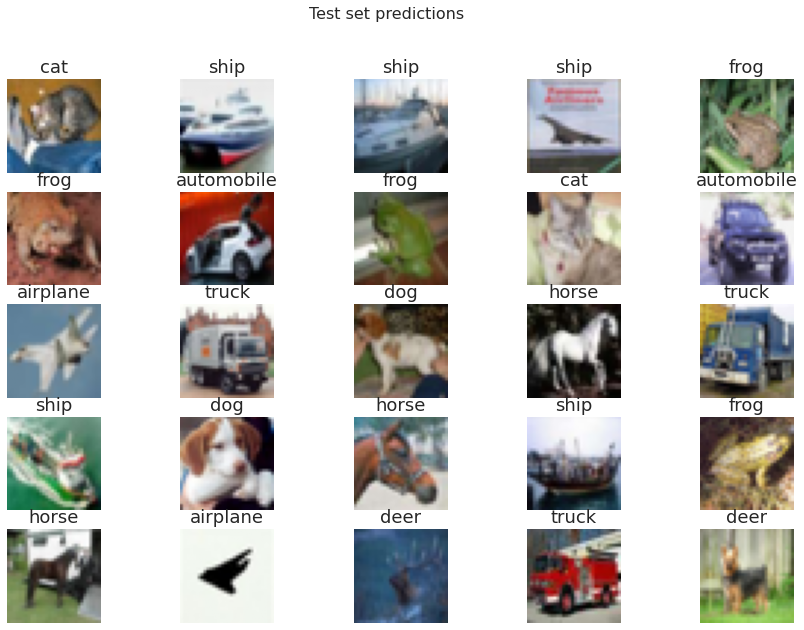

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(15, 10))
fig.suptitle(f"Test set predictions", fontsize=16)

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_test[i])
    ax.set_title(d[np.argmax(model6.predict(x_test[i].reshape(1, 32, 32, 3)), axis=-1)[0]])
    ax.axis('off')

### Saving our model

In [ ]:
model6.save('cifar10_model.h5')

In [ ]:
from keras.models import load_model
saved_model_h5 = load_model('/content/drive/MyDrive/cifar10_model.h5')

In [ ]:
saved_model_h5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        3

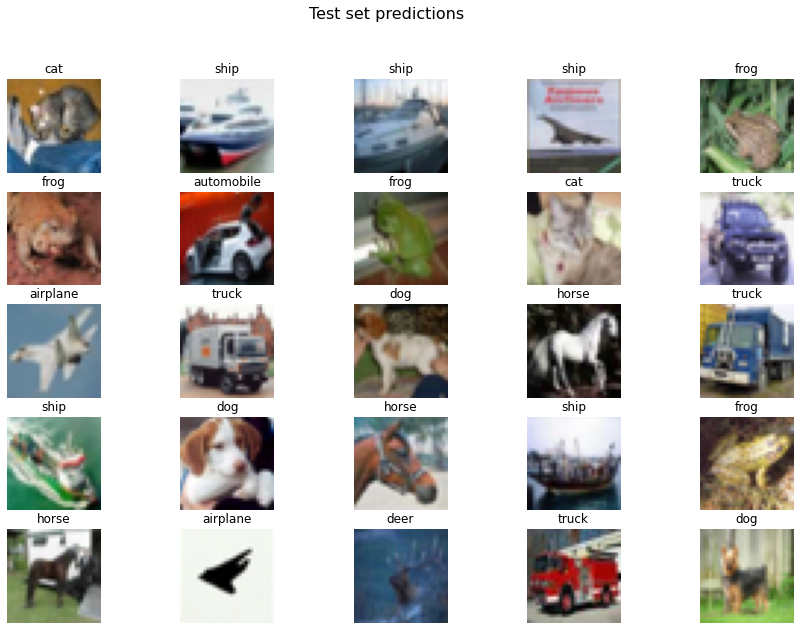

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(15, 10))
fig.suptitle(f"Test set predictions", fontsize=16)

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_test[i])
    ax.set_title(d[np.argmax(saved_model_h5.predict(x_test[i].reshape(1, 32, 32, 3)), axis=-1)[0]])
    ax.axis('off')

In [ ]:
model6.save('/content/drive/MyDrive/CIFAR_10_final_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CIFAR_10_final_model/assets


In [ ]:
from keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/CIFAR_10_final_model')

In [ ]:
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

### Making predictions with the saved model

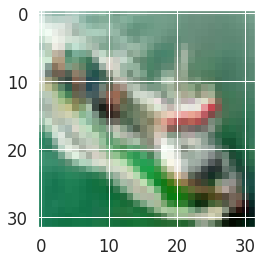

In [ ]:
my_new_image = x_test[15]

plt.imshow(my_new_image)

In [ ]:
input_img = my_new_image.reshape(1,32,32,3)

new_predictions = np.argmax(saved_model.predict(input_img), axis=-1)[0]

print(f"True class: {d[y_test[15][0]]} \n\nPredicted class: {d[new_predictions]}")

True class: ship 

Predicted class: ship


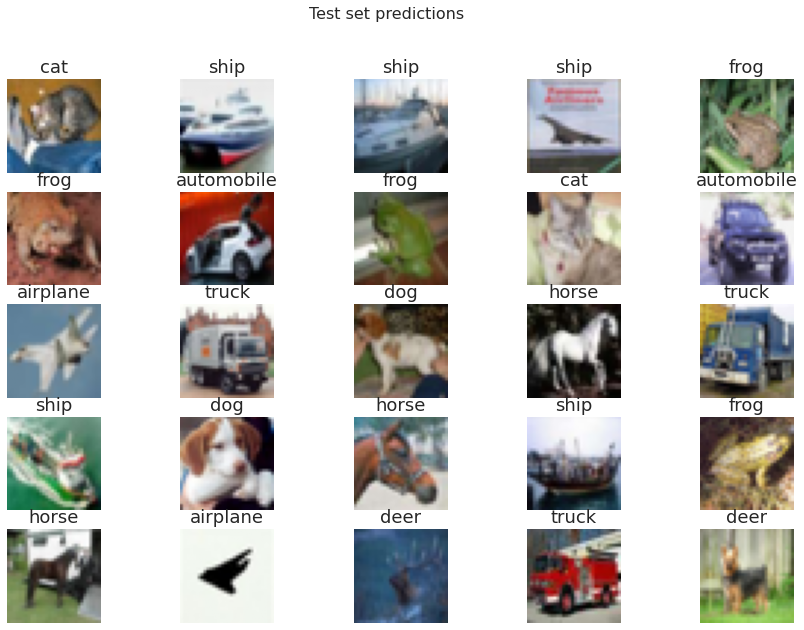

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(15, 10))
fig.suptitle(f"Test set predictions", fontsize=16)

for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_test[i])
    ax.set_title(d[np.argmax(saved_model.predict(x_test[i].reshape(1, 32, 32, 3)), axis=-1)[0]])
    ax.axis('off')